In [1]:
from config import api_key
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import plotly.express as px

In [3]:
def read_zip(url):
  # open url
  resp = urlopen(url)
  # read contents from url file
  zipfile = ZipFile(BytesIO(resp.read()))
  # convert to dataframe
  return pd.read_csv(zipfile.open(zipfile.namelist()[0]))

In [4]:
def melt_dataframe(df, val_name):
  # melt dataframe
  return pd.melt(df, 
                 id_vars=list(df.columns[:3]), 
                 value_vars=list(df.iloc[:, 3:].columns),# most recent date only [df.columns[-1]],
                 var_name='month', 
                 value_name=val_name)

In [5]:
se_url_dict = {}
se_url_dict['sfr'] = 'https://streeteasy-market-data-download.s3.amazonaws.com/sales/Sfr/medianAskingPrice_Sfr.zip'
se_url_dict['condo'] = 'https://streeteasy-market-data-download.s3.amazonaws.com/sales/Condo/medianAskingPrice_Condo.zip'
se_url_dict['coop'] = 'https://streeteasy-market-data-download.s3.amazonaws.com/sales/Coop/medianAskingPrice_Coop.zip'

In [6]:
df_list = []

# iterate through urls in dictionary
for k, v in se_url_dict.items():
  print('Get data for:', k)
  df = read_zip(v) # read value
  val_name = k + '_median_asking_price' # set value name
  df_melt = melt_dataframe(df, val_name) # melt dataframe
  df_list.append(df_melt) # append to master list of dataframes

Get data for: sfr
Get data for: condo
Get data for: coop


In [7]:
df_all = df_list[0]
for i in range(1, len(df_list)):
  last_col = list(df_list[i].columns)[-1]
  df_all[last_col] = df_list[i].iloc[:, -1]

In [8]:
df_all[['Year', 'Month']] = df_all['month'].str.split('-', expand=True).rename(columns={0:'Year', 1:'Month'})

In [9]:
df_all.groupby('Year')

In [10]:
ask_all = pd.read_csv(r"C:\Users\Peter Morris\Downloads\medianAskingPrice_All\medianAskingPrice_All.csv")

In [11]:
perc = 75.0
min_count =  int(((100-perc)/100)*ask_all.shape[1] + 1)
mod_df_all = ask_all.dropna(axis=0, thresh=min_count)

In [12]:
mod_df_all

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,All Downtown,Manhattan,submarket,1399000.0,1395000.0,1322500.0,1295000.0,1265000.0,1225000.0,1188000.0,...,1995000.0,2050000.0,2200000.0,2100000.0,1925000.0,1799000.0,1825000.0,1895000.0,1990000.0,1999000.0
1,All Midtown,Manhattan,submarket,895000.0,885000.0,899000.0,895000.0,885000.0,889000.0,875000.0,...,1100000.0,1120000.0,1175000.0,1199000.0,1200000.0,1195000.0,1195000.0,1200000.0,1235000.0,1200000.0
2,All Upper East Side,Manhattan,submarket,1200000.0,1195000.0,1185000.0,1195000.0,1100000.0,1129000.0,1100000.0,...,1600000.0,1600000.0,1600000.0,1595000.0,1577500.0,1500000.0,1497000.0,1572518.0,1595000.0,1650000.0
3,All Upper Manhattan,Manhattan,submarket,539500.0,539000.0,525000.0,525000.0,499000.0,499000.0,499000.0,...,695000.0,699000.0,675000.0,679000.0,665000.0,675000.0,675000.0,692500.0,700000.0,699000.0
4,All Upper West Side,Manhattan,submarket,1050000.0,1060000.0,1071019.0,999000.0,1049000.0,998875.0,999000.0,...,1595000.0,1595000.0,1680000.0,1750000.0,1695000.0,1650000.0,1750000.0,1750000.0,1699500.0,1795000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Williamsbridge,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,672000.0,679000.0,664000.0,599000.0,679000.0,700000.0,632500.0,NaN,609000.0,622000.0
192,Williamsburg,Brooklyn,neighborhood,629000.0,629995.0,629000.0,636000.0,640000.0,640000.0,640000.0,...,1339000.0,1395000.0,1425000.0,1336500.0,1300000.0,1299000.0,1250000.0,1385000.0,1395000.0,1500000.0
193,Windsor Terrace,Brooklyn,neighborhood,614000.0,629000.0,575000.0,549000.0,575000.0,575000.0,594000.0,...,995000.0,995000.0,995000.0,860000.0,975000.0,1100000.0,1199000.0,1299000.0,1299000.0,1362500.0
194,Woodhaven,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,725000.0,699000.0,699000.0,724500.0,698888.0,612000.0,709000.0,725000.0,750000.0,743500.0


In [13]:
df_dates = mod_df_all.iloc[:,3:]
df_dates

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,1399000.0,1395000.0,1322500.0,1295000.0,1265000.0,1225000.0,1188000.0,1131000.0,1099000.0,1100000.0,...,1995000.0,2050000.0,2200000.0,2100000.0,1925000.0,1799000.0,1825000.0,1895000.0,1990000.0,1999000.0
1,895000.0,885000.0,899000.0,895000.0,885000.0,889000.0,875000.0,875000.0,839000.0,860000.0,...,1100000.0,1120000.0,1175000.0,1199000.0,1200000.0,1195000.0,1195000.0,1200000.0,1235000.0,1200000.0
2,1200000.0,1195000.0,1185000.0,1195000.0,1100000.0,1129000.0,1100000.0,1050000.0,1000000.0,1060000.0,...,1600000.0,1600000.0,1600000.0,1595000.0,1577500.0,1500000.0,1497000.0,1572518.0,1595000.0,1650000.0
3,539500.0,539000.0,525000.0,525000.0,499000.0,499000.0,499000.0,499000.0,497000.0,477500.0,...,695000.0,699000.0,675000.0,679000.0,665000.0,675000.0,675000.0,692500.0,700000.0,699000.0
4,1050000.0,1060000.0,1071019.0,999000.0,1049000.0,998875.0,999000.0,998875.0,995000.0,995000.0,...,1595000.0,1595000.0,1680000.0,1750000.0,1695000.0,1650000.0,1750000.0,1750000.0,1699500.0,1795000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,672000.0,679000.0,664000.0,599000.0,679000.0,700000.0,632500.0,NaN,609000.0,622000.0
192,629000.0,629995.0,629000.0,636000.0,640000.0,640000.0,640000.0,625000.0,622495.0,615000.0,...,1339000.0,1395000.0,1425000.0,1336500.0,1300000.0,1299000.0,1250000.0,1385000.0,1395000.0,1500000.0
193,614000.0,629000.0,575000.0,549000.0,575000.0,575000.0,594000.0,594000.0,599000.0,577000.0,...,995000.0,995000.0,995000.0,860000.0,975000.0,1100000.0,1199000.0,1299000.0,1299000.0,1362500.0
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,725000.0,699000.0,699000.0,724500.0,698888.0,612000.0,709000.0,725000.0,750000.0,743500.0


In [14]:
df_dates.columns = pd.to_datetime(df_dates.columns)

In [15]:
mod_df_all.iloc[:,:3]

,areaName,Borough,areaType
0,All Downtown,Manhattan,submarket
1,All Midtown,Manhattan,submarket
2,All Upper East Side,Manhattan,submarket
3,All Upper Manhattan,Manhattan,submarket
4,All Upper West Side,Manhattan,submarket
...,...,...,...
191,Williamsbridge,Bronx,neighborhood
192,Williamsburg,Brooklyn,neighborhood
193,Windsor Terrace,Brooklyn,neighborhood
194,Woodhaven,Queens,neighborhood


In [16]:
print('Len data:', len(df_all))
df_all.head(10)

Len data: 29898


,areaName,Borough,areaType,month,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price,Year,Month
0,All Downtown,Manhattan,submarket,2010-01,7150000.0,1679000.0,749000.0,2010,01
1,All Midtown,Manhattan,submarket,2010-01,4525000.0,1195000.0,595000.0,2010,01
2,All Upper East Side,Manhattan,submarket,2010-01,9900000.0,1585000.0,900500.0,2010,01
3,All Upper Manhattan,Manhattan,submarket,2010-01,1292500.0,638800.0,349000.0,2010,01
4,All Upper West Side,Manhattan,submarket,2010-01,4122500.0,1495000.0,729023.0,2010,01
5,Astoria,Queens,neighborhood,2010-01,947500.0,469000.0,NaN,2010,01
6,Auburndale,Queens,neighborhood,2010-01,NaN,NaN,NaN,2010,01
7,Bath Beach,Brooklyn,neighborhood,2010-01,NaN,NaN,NaN,2010,01
8,Battery Park City,Manhattan,neighborhood,2010-01,NaN,875000.0,NaN,2010,01
9,Bay Ridge,Brooklyn,neighborhood,2010-01,894000.0,NaN,272000.0,2010,01


In [17]:
perc = 75.0
min_count =  int(((100-perc)/100)*df_all.shape[1] + 1)
mod_df_all = df_all.dropna(axis=0, thresh=min_count)

In [18]:
pd.set_option('display.float_format', '{:.0f}'.format)
year_area = df_all.groupby(['areaName','Borough','Year'], as_index=False).mean().dropna()

In [19]:
year_area

,areaName,Borough,Year,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price
0,All Downtown,Manhattan,2010,7033958,1555562,679917
1,All Downtown,Manhattan,2011,7214375,1473333,649917
2,All Downtown,Manhattan,2012,7131042,1549333,686125
3,All Downtown,Manhattan,2013,8726000,2161575,739542
4,All Downtown,Manhattan,2014,9496250,2960333,802000
...,...,...,...,...,...,...
2542,Woodside,Queens,2017,1161100,570625,318375
2543,Woodside,Queens,2018,1130833,753000,380292
2544,Woodside,Queens,2019,1194500,737000,353500
2546,Woodside,Queens,2021,1511350,602569,339479


In [20]:
year_area[year_area['areaName']=='All Upper East Side']

,areaName,Borough,Year,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price
26,All Upper East Side,Manhattan,2010,10457083,1605802,856042
27,All Upper East Side,Manhattan,2011,11435417,1460583,789417
28,All Upper East Side,Manhattan,2012,14118750,1629418,845867
29,All Upper East Side,Manhattan,2013,13571250,2157500,930167
30,All Upper East Side,Manhattan,2014,13718750,2525625,1122333
31,All Upper East Side,Manhattan,2015,14942500,2412042,1413833
32,All Upper East Side,Manhattan,2016,14919375,2596208,1524167
33,All Upper East Side,Manhattan,2017,15179167,2513292,1563792
34,All Upper East Side,Manhattan,2018,13574750,2414083,1367083
35,All Upper East Side,Manhattan,2019,11670125,2239333,1293333


array([[<AxesSubplot:title={'center':'sfr_median_asking_price'}>,
        <AxesSubplot:title={'center':'condo_median_asking_price'}>],
       [<AxesSubplot:title={'center':'coop_median_asking_price'}>,
        <AxesSubplot:>]], dtype=object)

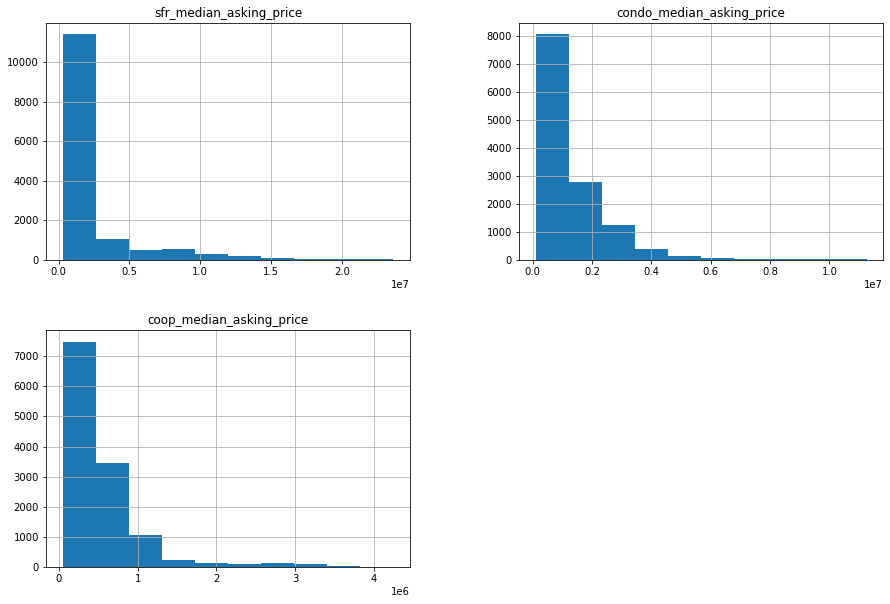

In [21]:
df_all.hist(figsize=(15,10))

In [22]:
year_area['Year'].unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'], dtype=object)

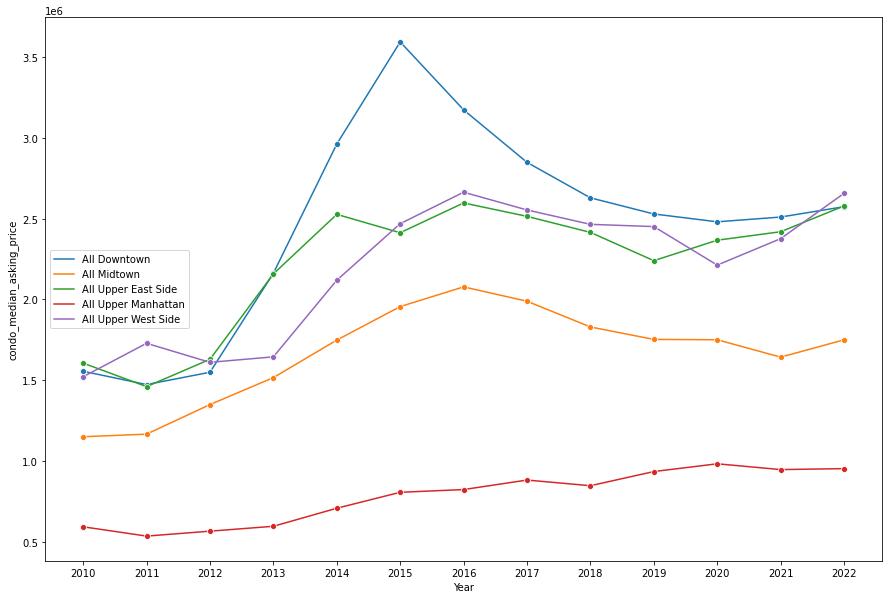

In [23]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(data=year_area, hue=year_area['areaName'][:65], x='Year', y='condo_median_asking_price', marker="o")
plt.legend(loc=6)
# plt.plot(year_area['Year'], year_area['condo_median_asking_price'],hue=year_area['areaName'][:65])
plt.show()

In [24]:
boro_year = df_all.groupby(['Borough','Year'], as_index=False).mean().dropna()

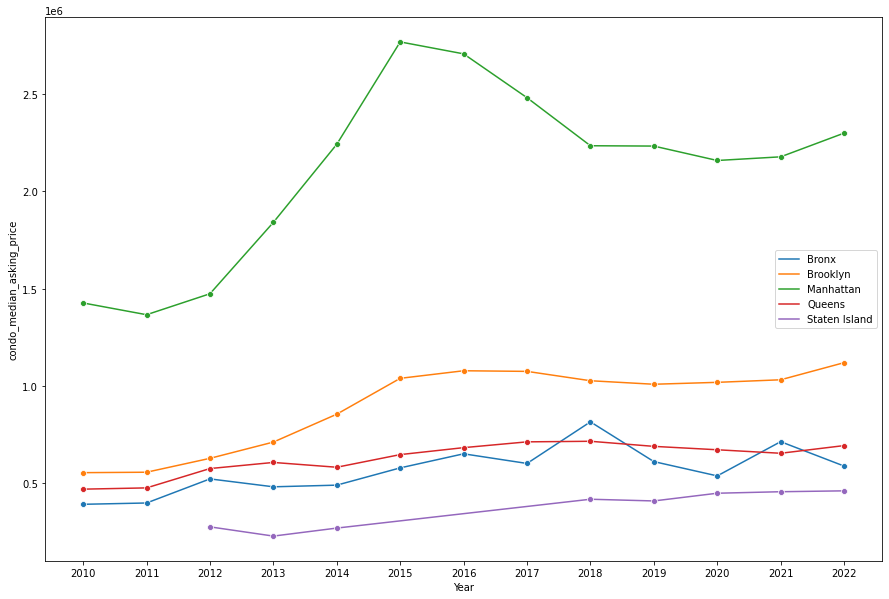

In [25]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(data=boro_year, hue=boro_year['Borough'], x='Year', y='condo_median_asking_price', marker="o")
plt.legend(loc=7)
plt.show()

In [26]:
df_all[df_all['areaName']=='Bedford-Stuyvesant']

,areaName,Borough,areaType,month,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price,Year,Month
13,Bedford-Stuyvesant,Brooklyn,neighborhood,2010-01,662500,447000,NaN,2010,01
211,Bedford-Stuyvesant,Brooklyn,neighborhood,2010-02,675000,425000,NaN,2010,02
409,Bedford-Stuyvesant,Brooklyn,neighborhood,2010-03,650000,459000,NaN,2010,03
607,Bedford-Stuyvesant,Brooklyn,neighborhood,2010-04,614000,450000,NaN,2010,04
805,Bedford-Stuyvesant,Brooklyn,neighborhood,2010-05,609500,450000,NaN,2010,05
...,...,...,...,...,...,...,...,...,...
28921,Bedford-Stuyvesant,Brooklyn,neighborhood,2022-03,1891944,710000,NaN,2022,03
29119,Bedford-Stuyvesant,Brooklyn,neighborhood,2022-04,1900000,694235,NaN,2022,04
29317,Bedford-Stuyvesant,Brooklyn,neighborhood,2022-05,1999000,719000,NaN,2022,05
29515,Bedford-Stuyvesant,Brooklyn,neighborhood,2022-06,1965000,719000,NaN,2022,06


In [71]:
df = df_all.copy()
df.drop(['month'], axis=1, inplace=True)
df.sort_values(['areaName', 'Year'], inplace=True)
df = df[df['areaType'] == 'neighborhood']
df.drop(['areaType'], axis=1, inplace=True)
df.drop(df[df.isnull().sum(axis=1)>2].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df = df[['areaName', 'Borough', 'Year', 'Month',
         'sfr_median_asking_price', 'condo_median_asking_price',
         'coop_median_asking_price']]
df

,areaName,Borough,Year,Month,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price
0,Astoria,Queens,2010,01,947500,469000,NaN
1,Astoria,Queens,2010,02,947500,477000,NaN
2,Astoria,Queens,2010,03,879500,485000,NaN
3,Astoria,Queens,2010,04,NaN,449000,NaN
4,Astoria,Queens,2010,05,NaN,452500,285000
...,...,...,...,...,...,...,...
16429,Woodside,Queens,2022,03,1488888,690000,330000
16430,Woodside,Queens,2022,04,1475000,690000,348888
16431,Woodside,Queens,2022,05,1545000,661500,344444
16432,Woodside,Queens,2022,06,1540000,665000,348888


In [73]:
df['Borough'].replace('Manhattan', 1, inplace=True)
df['Borough'].replace('Bronx', 2, inplace=True)
df['Borough'].replace('Brooklyn', 3, inplace=True)
df['Borough'].replace('Queens', 4, inplace=True)
df['Borough'].replace('Staten Island', 5, inplace=True)

In [75]:
df = df.rename(columns = {'areaName':'Neighborhood'})

In [80]:
df['Borough'] = df['Borough'].astype(int)
df['Month'] = df['Month'].astype(int)

In [81]:
df

,Neighborhood,Borough,Year,Month,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price
0,Astoria,4,2010,1,947500,469000,NaN
1,Astoria,4,2010,2,947500,477000,NaN
2,Astoria,4,2010,3,879500,485000,NaN
3,Astoria,4,2010,4,NaN,449000,NaN
4,Astoria,4,2010,5,NaN,452500,285000
...,...,...,...,...,...,...,...
16429,Woodside,4,2022,3,1488888,690000,330000
16430,Woodside,4,2022,4,1475000,690000,348888
16431,Woodside,4,2022,5,1545000,661500,344444
16432,Woodside,4,2022,6,1540000,665000,348888


In [27]:
bkl = df_all[df_all['Borough']=='Brooklyn'].copy()
bkl = bkl[bkl['areaType']=='neighborhood']
bkl.drop(['month', 'Month'], axis=1, inplace=True)
bkl = bkl.groupby(['areaName','Year'], as_index=False).mean()

In [28]:
bkl.drop(bkl[bkl.isnull().sum(axis=1)>=3].index,axis=0,inplace=True)

In [43]:
bkl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 208 to 636
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   areaName                   587 non-null    object 
 1   Year                       587 non-null    object 
 2   sfr_median_asking_price    528 non-null    float64
 3   condo_median_asking_price  452 non-null    float64
 4   coop_median_asking_price   316 non-null    float64
dtypes: float64(3), object(2)
memory usage: 27.5+ KB


In [34]:
bath_bw = bkl.iloc[:134,:].sort_values('Year')
bath_bw

,areaName,Year,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price
52,Bergen Beach,2010,719000,497000,NaN
91,Brighton Beach,2010,NaN,543167,NaN
104,Brooklyn Heights,2010,3287271,898667,481500
130,Bushwick,2010,546292,353667,NaN
13,Bay Ridge,2010,887771,NaN,281862
...,...,...,...,...,...
129,Brownsville,2022,886350,NaN,NaN
64,Bergen Beach,2022,967429,425000,NaN
25,Bay Ridge,2022,1452357,829357,370714
90,Borough Park,2022,1564564,631014,NaN


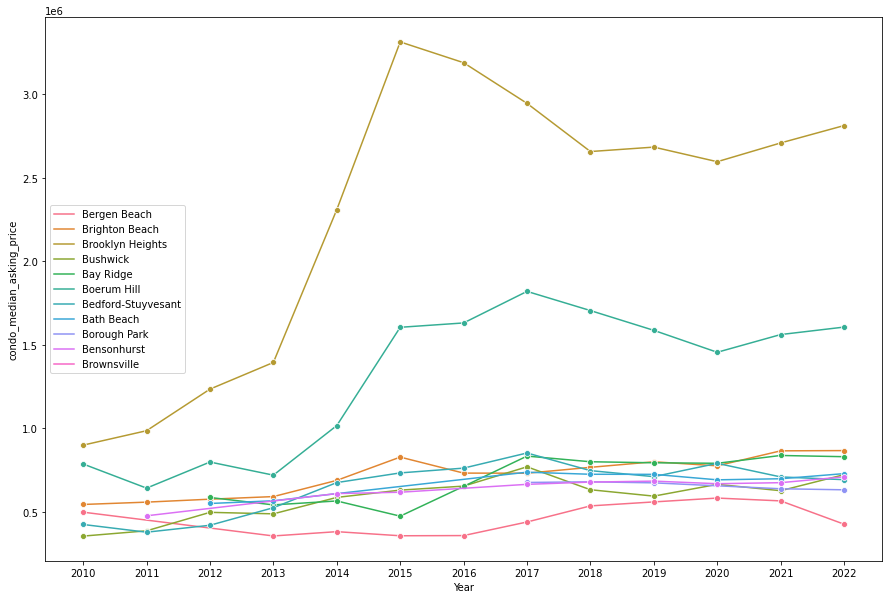

In [35]:
plt.figure(figsize=(15,10))
sns.lineplot(data=bath_bw, hue=bath_bw['areaName'], x='Year', y='condo_median_asking_price', marker="o")
plt.legend(loc=6)
plt.show()

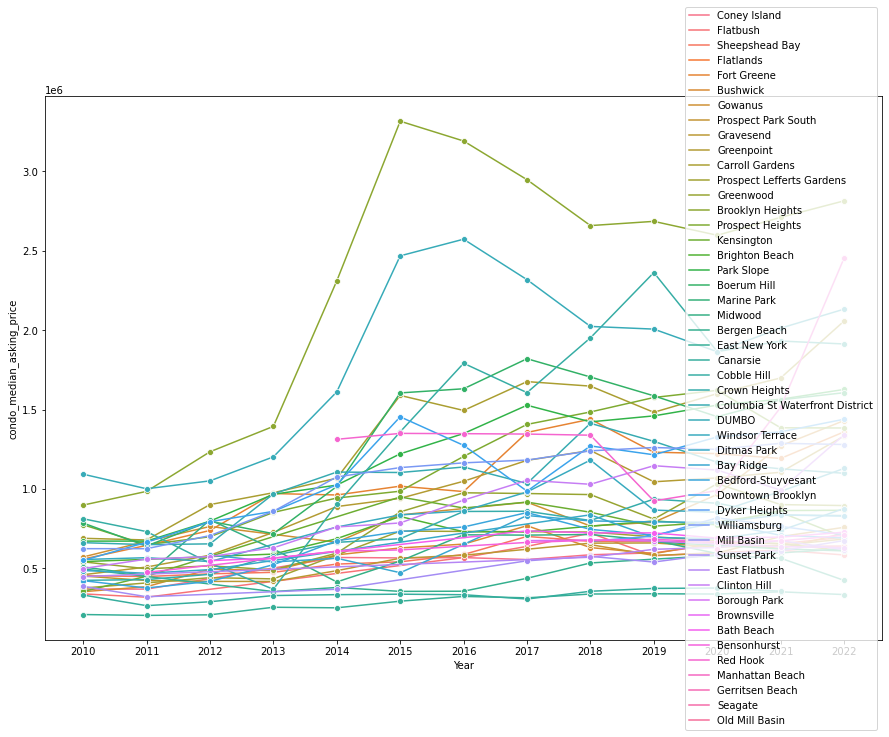

In [42]:
bkl = bkl.sort_values('Year')
plt.figure(figsize=(15,10))
sns.lineplot(data=bkl, hue=bkl['areaName'], x='Year', y='condo_median_asking_price', marker="o")
plt.legend(loc=7)
plt.show()

In [ ]:
# summary statistics for all neighborhoods and all quarters of the year in the last decade
df_all.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,sfr_median_asking_price,condo_median_asking_price,coop_median_asking_price
count,14068,12610,12697
mean,2209885,1278689,559407
std,2912041,1039365,502812
min,275000,99000,46375
25%,740000,605000,266500
50%,1172500,879000,399000
75%,1975000,1597500,690000
max,23650000,11250000,4250000


In [ ]:
import requests
import json
import pandas as pd

data = requests.get("https://cocl.us/new_york_dataset")
json_data = data.json()

geo = pd.json_normalize(json_data["features"])
geo


,type,id,geometry_name,geometry.type,geometry.coordinates,properties.name,properties.stacked,properties.annoline1,properties.annoline2,properties.annoline3,properties.annoangle,properties.borough,properties.bbox
0,Feature,nyu_2451_34572.1,geom,Point,"[-73.84720052054902, 40.89470517661]",Wakefield,1,Wakefield,None,None,0.0,Bronx,"[-73.84720052054902, 40.89470517661, -73.84720..."
1,Feature,nyu_2451_34572.2,geom,Point,"[-73.82993910812398, 40.87429419303012]",Co-op City,2,Co-op,City,None,0.0,Bronx,"[-73.82993910812398, 40.87429419303012, -73.82..."
2,Feature,nyu_2451_34572.3,geom,Point,"[-73.82780644716412, 40.887555677350775]",Eastchester,1,Eastchester,None,None,0.0,Bronx,"[-73.82780644716412, 40.887555677350775, -73.8..."
3,Feature,nyu_2451_34572.4,geom,Point,"[-73.90564259591682, 40.89543742690383]",Fieldston,1,Fieldston,None,None,0.0,Bronx,"[-73.90564259591682, 40.89543742690383, -73.90..."
4,Feature,nyu_2451_34572.5,geom,Point,"[-73.9125854610857, 40.890834493891305]",Riverdale,1,Riverdale,None,None,0.0,Bronx,"[-73.9125854610857, 40.890834493891305, -73.91..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Feature,nyu_2451_34572.302,geom,Point,"[-74.00011136202637, 40.75665808227519]",Hudson Yards,2,Hudson,Yards,None,0.0,Manhattan,"[-74.00011136202637, 40.75665808227519, -74.00..."
302,Feature,nyu_2451_34572.303,geom,Point,"[-73.80553002968718, 40.58733774018741]",Hammels,1,Hammels,None,None,0.0,Queens,"[-73.80553002968718, 40.58733774018741, -73.80..."
303,Feature,nyu_2451_34572.304,geom,Point,"[-73.76596781445627, 40.611321691283834]",Bayswater,1,Bayswater,None,None,0.0,Queens,"[-73.76596781445627, 40.611321691283834, -73.7..."
304,Feature,nyu_2451_34572.305,geom,Point,"[-73.94563070334091, 40.756091297094706]",Queensbridge,1,Queensbridge,None,None,0.0,Queens,"[-73.94563070334091, 40.756091297094706, -73.9..."


In [ ]:
geo[['longitude','latitude']] = geo['geometry.coordinates'].astype(str).str.strip('[]')                        \
                                .astype(str).str.split(', ', expand=True)                   \
                                .rename(columns={0:'Longitude', 1:'Latitude'})

In [ ]:
geo

,type,id,geometry_name,geometry.type,geometry.coordinates,properties.name,properties.stacked,properties.annoline1,properties.annoline2,properties.annoline3,properties.annoangle,properties.borough,properties.bbox,longitude,latitude
0,Feature,nyu_2451_34572.1,geom,Point,"[-73.84720052054902, 40.89470517661]",Wakefield,1,Wakefield,None,None,0.0,Bronx,"[-73.84720052054902, 40.89470517661, -73.84720...",-73.84720052054902,40.89470517661
1,Feature,nyu_2451_34572.2,geom,Point,"[-73.82993910812398, 40.87429419303012]",Co-op City,2,Co-op,City,None,0.0,Bronx,"[-73.82993910812398, 40.87429419303012, -73.82...",-73.82993910812398,40.87429419303012
2,Feature,nyu_2451_34572.3,geom,Point,"[-73.82780644716412, 40.887555677350775]",Eastchester,1,Eastchester,None,None,0.0,Bronx,"[-73.82780644716412, 40.887555677350775, -73.8...",-73.82780644716412,40.887555677350775
3,Feature,nyu_2451_34572.4,geom,Point,"[-73.90564259591682, 40.89543742690383]",Fieldston,1,Fieldston,None,None,0.0,Bronx,"[-73.90564259591682, 40.89543742690383, -73.90...",-73.90564259591682,40.89543742690383
4,Feature,nyu_2451_34572.5,geom,Point,"[-73.9125854610857, 40.890834493891305]",Riverdale,1,Riverdale,None,None,0.0,Bronx,"[-73.9125854610857, 40.890834493891305, -73.91...",-73.9125854610857,40.890834493891305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Feature,nyu_2451_34572.302,geom,Point,"[-74.00011136202637, 40.75665808227519]",Hudson Yards,2,Hudson,Yards,None,0.0,Manhattan,"[-74.00011136202637, 40.75665808227519, -74.00...",-74.00011136202637,40.75665808227519
302,Feature,nyu_2451_34572.303,geom,Point,"[-73.80553002968718, 40.58733774018741]",Hammels,1,Hammels,None,None,0.0,Queens,"[-73.80553002968718, 40.58733774018741, -73.80...",-73.80553002968718,40.58733774018741
303,Feature,nyu_2451_34572.304,geom,Point,"[-73.76596781445627, 40.611321691283834]",Bayswater,1,Bayswater,None,None,0.0,Queens,"[-73.76596781445627, 40.611321691283834, -73.7...",-73.76596781445627,40.611321691283834
304,Feature,nyu_2451_34572.305,geom,Point,"[-73.94563070334091, 40.756091297094706]",Queensbridge,1,Queensbridge,None,None,0.0,Queens,"[-73.94563070334091, 40.756091297094706, -73.9...",-73.94563070334091,40.756091297094706


In [ ]:
pd.set_option("display.precision", 7)
geo['longitude'] = geo['longitude'].astype(float).round(7)
geo['latitude'] = geo['latitude'].astype(float).round(7)
geo

,type,id,geometry_name,geometry.type,geometry.coordinates,properties.name,properties.stacked,properties.annoline1,properties.annoline2,properties.annoline3,properties.annoangle,properties.borough,properties.bbox,longitude,latitude
0,Feature,nyu_2451_34572.1,geom,Point,"[-73.84720052054902, 40.89470517661]",Wakefield,1,Wakefield,None,None,0.0,Bronx,"[-73.84720052054902, 40.89470517661, -73.84720...",-73.8472005,40.8947052
1,Feature,nyu_2451_34572.2,geom,Point,"[-73.82993910812398, 40.87429419303012]",Co-op City,2,Co-op,City,None,0.0,Bronx,"[-73.82993910812398, 40.87429419303012, -73.82...",-73.8299391,40.8742942
2,Feature,nyu_2451_34572.3,geom,Point,"[-73.82780644716412, 40.887555677350775]",Eastchester,1,Eastchester,None,None,0.0,Bronx,"[-73.82780644716412, 40.887555677350775, -73.8...",-73.8278064,40.8875557
3,Feature,nyu_2451_34572.4,geom,Point,"[-73.90564259591682, 40.89543742690383]",Fieldston,1,Fieldston,None,None,0.0,Bronx,"[-73.90564259591682, 40.89543742690383, -73.90...",-73.9056426,40.8954374
4,Feature,nyu_2451_34572.5,geom,Point,"[-73.9125854610857, 40.890834493891305]",Riverdale,1,Riverdale,None,None,0.0,Bronx,"[-73.9125854610857, 40.890834493891305, -73.91...",-73.9125855,40.8908345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Feature,nyu_2451_34572.302,geom,Point,"[-74.00011136202637, 40.75665808227519]",Hudson Yards,2,Hudson,Yards,None,0.0,Manhattan,"[-74.00011136202637, 40.75665808227519, -74.00...",-74.0001114,40.7566581
302,Feature,nyu_2451_34572.303,geom,Point,"[-73.80553002968718, 40.58733774018741]",Hammels,1,Hammels,None,None,0.0,Queens,"[-73.80553002968718, 40.58733774018741, -73.80...",-73.8055300,40.5873377
303,Feature,nyu_2451_34572.304,geom,Point,"[-73.76596781445627, 40.611321691283834]",Bayswater,1,Bayswater,None,None,0.0,Queens,"[-73.76596781445627, 40.611321691283834, -73.7...",-73.7659678,40.6113217
304,Feature,nyu_2451_34572.305,geom,Point,"[-73.94563070334091, 40.756091297094706]",Queensbridge,1,Queensbridge,None,None,0.0,Queens,"[-73.94563070334091, 40.756091297094706, -73.9...",-73.9456307,40.7560913


In [ ]:
geo_ = geo[['properties.name', 'longitude', 'latitude']]

In [ ]:
geo_

,properties.name,longitude,latitude
0,Wakefield,-73.8472005,40.8947052
1,Co-op City,-73.8299391,40.8742942
2,Eastchester,-73.8278064,40.8875557
3,Fieldston,-73.9056426,40.8954374
4,Riverdale,-73.9125855,40.8908345
...,...,...,...
301,Hudson Yards,-74.0001114,40.7566581
302,Hammels,-73.8055300,40.5873377
303,Bayswater,-73.7659678,40.6113217
304,Queensbridge,-73.9456307,40.7560913


In [ ]:
geo_ = geo_[['properties.name', 'latitude', 'longitude']] # reorder columns

In [ ]:
geo_

,properties.name,latitude,longitude
0,Wakefield,40.8947052,-73.8472005
1,Co-op City,40.8742942,-73.8299391
2,Eastchester,40.8875557,-73.8278064
3,Fieldston,40.8954374,-73.9056426
4,Riverdale,40.8908345,-73.9125855
...,...,...,...
301,Hudson Yards,40.7566581,-74.0001114
302,Hammels,40.5873377,-73.8055300
303,Bayswater,40.6113217,-73.7659678
304,Queensbridge,40.7560913,-73.9456307


In [ ]:
geo_[(geo_['latitude'] > 40.50) & (geo_['latitude'] < 41.51)
& (geo_['longitude'] > -74.24) & (geo_['longitude'] < -74.22)]

,properties.name,latitude,longitude
238,Butler Manor,40.5060817,-74.2295035
239,Charleston,40.5305315,-74.2321578
293,Richmond Valley,40.5195415,-74.2295708


In [ ]:
print(min(geo_['latitude']), max(geo_['latitude']), min(geo_['longitude']), max(geo_['longitude']))

40.5053338 40.9085428 -74.2465693 -73.7088471
